### PHASE-1 : DATA PREPARATION

In addition to leveraging data files, we have augmented our data acquisition by consulting various reputable sources. These sources include:

1. FindEasy (https://www.findeasy.in/indian-states-by-literacy-rate/):

This platform provides comprehensive information on literacy rates across Indian states, contributing valuable insights to our analysis.


2. Wikipedia (https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_literacy_rate):

Utilizing the well-established and publicly accessible information on Wikipedia, we have integrated data related to literacy rates for Indian states and union territories into our research.


3. India Census (https://www.indiacensus.net/literacy-rate.php):

The official census data from India Census has been instrumental in enriching our dataset, offering authoritative and up-to-date literacy rate statistics.

By incorporating data from these diverse and reliable sources, we aim to ensure the robustness and comprehensiveness of our analysis on literacy rates in Indian states and union territories. This multi-faceted approach enhances the credibility and validity of the findings presented in our report.

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Get data from CSV into DataFrame

census = pd.read_csv('census.csv')
ipc = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [3]:
# merging two DataFrames based on a common column STATE/UT

ipc = ipc.merge(census, on='STATE/UT', how='left')

# Phase -2: Exploratory Data Analysis

In [4]:
# Checking the list of available columns after merging the required tables of the data

ipc.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Area (km)', 'Population', 'Literacy Rate (%)'],
      dtype='object')

In [5]:
# Create a Dataframe of Statewise : total IPC Crimes, literacy rates, population & crime rate

ipc_grouped = ipc.groupby('STATE/UT').agg({'TOTAL IPC CRIMES': 'sum' , 'Literacy Rate (%)': 'mean','Population': 'mean'} )
#ipc_grouped = ipc_grouped.merge(census, on='STATE/UT', how='left')
ipc_grouped['Crime Rate'] = ipc_grouped['TOTAL IPC CRIMES'] / ipc_grouped['Population'] *100

ipc_grouped

,TOTAL IPC CRIMES,Literacy Rate (%),Population,Crime Rate
STATE/UT,,,,
A & N ISLANDS,9102,86.27,417036.0,2.182545
ANDHRA PRADESH,2018981,66.40,54059448.0,3.734742
ARUNACHAL PRADESH,27652,66.95,1530531.0,1.806693
ASSAM,597764,85.90,35607039.0,1.678780
BIHAR,1346293,70.90,128633376.0,1.046613
CHANDIGARH,40807,86.05,1158473.0,3.522482
CHHATTISGARH,561027,77.30,29436231.0,1.905906
D & N HAVELI,4651,88.12,28516.0,16.310142
DAMAN & DIU,2948,87.07,242911.0,1.213613


# All IPC Crimes

## 2.1	Analysis of Literacy Rate vs Total Crimes.

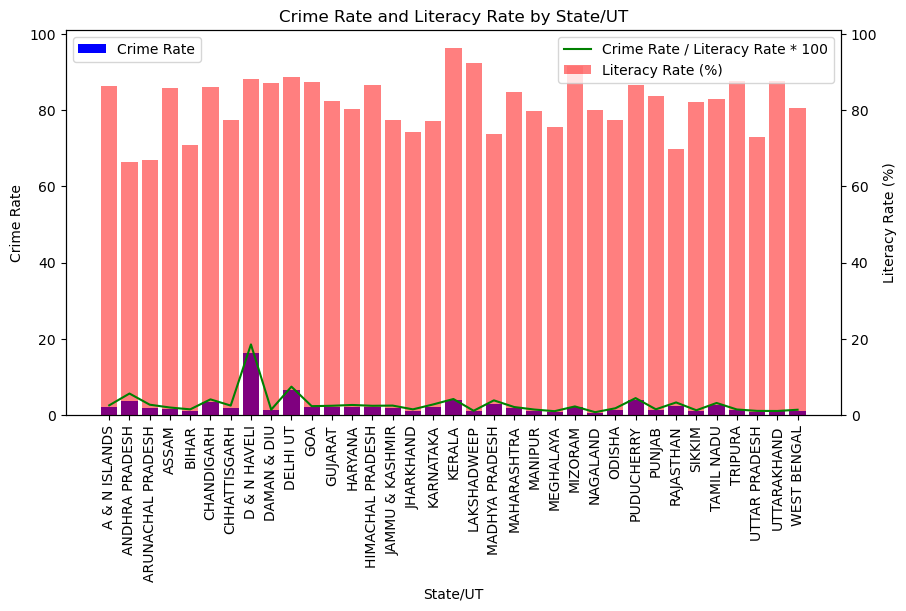

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(ipc_grouped.index, ipc_grouped['Crime Rate'], color='b', label='Crime Rate')
ax1.set_xlabel('State/UT')
ax1.set_ylabel('Crime Rate')
ax1.set_title('Crime Rate and Literacy Rate by State/UT')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()

# Plot the population density
ax2.bar(ipc_grouped.index, ipc_grouped['Literacy Rate (%)'], color='r', alpha=0.5, label='Literacy Rate (%)')
ax2.set_ylabel('Literacy Rate (%)')

# Calculate the ratio of crime rate and literacy rate multiplied by 100
ratio = ipc_grouped['Crime Rate'] / ipc_grouped['Literacy Rate (%)'] * 100

# Plot the ratio as a line graph
ax2.plot(ipc_grouped.index, ratio, color='g', label='Crime Rate / Literacy Rate * 100')

ax1.set_ylim(ax2.get_ylim())

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

<Axes: >

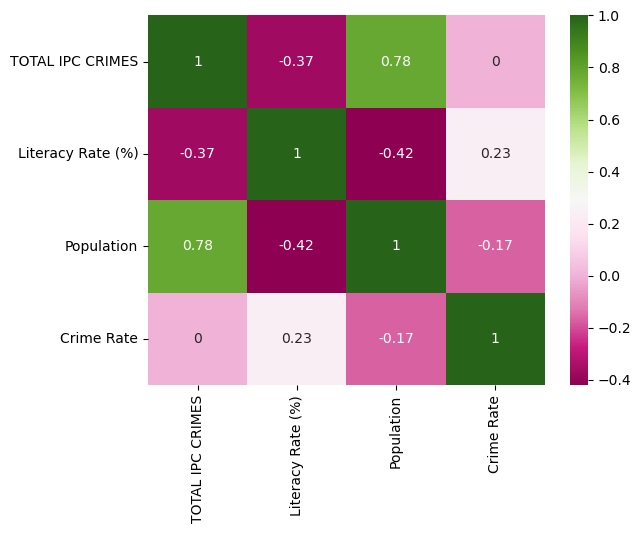

In [7]:
sns.heatmap(round(ipc_grouped.corr(),2), cmap = 'PiYG', annot = True)

**CONCLUSION**

The bar graph indicates a general trend wherein states with higher literacy rates tend to exhibit lower crime rates, with the exception of Daman and Diu (D & N Haveli), where a paradoxical scenario emerges with both high literacy and crime rates.

Analysis of the correlation map reveals significant patterns:

a. Total IPC Crimes exhibit a strong positive correlation with population.

b. Literacy Rate demonstrates a negative correlation with both Total IPC Crime and population.

## 2.2 Analysis of the type of crime vs each state vs Literacy rate.

In [8]:
# Grouping the type/nature of crime in separate list

violent_crimes_against_persons = [
    'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
    'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE'
]

crimes_against_property = [
    'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY',
    'ROBBERY', 'BURGLARY', 'THEFT',
    'AUTO THEFT', 'OTHER THEFT', 'ARSON'
]

abduction_and_trafficking_crimes = [
    'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'KIDNAPPING AND ABDUCTION OF OTHERS', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'
]

other_crimes = [
    'RIOTS', 'CRIMINAL BREACH OF TRUST',
    'CHEATING', 'COUNTERFIETING',
    'INSULT TO MODESTY OF WOMEN', 'OTHER IPC CRIMES'
]

# Adding crime category to ipc DF

crime_cat = [violent_crimes_against_persons, crimes_against_property, abduction_and_trafficking_crimes,other_crimes ]
ipc['Violent Crimes Against Persons'] = ipc[violent_crimes_against_persons].sum(axis=1)
ipc['Crimes Against Property'] = ipc[crimes_against_property].sum(axis=1)
ipc['Abduction and Trafficking Crimes'] = ipc[abduction_and_trafficking_crimes].sum(axis=1)
ipc['Other Crimes'] = ipc[other_crimes].sum(axis=1)

<Axes: >

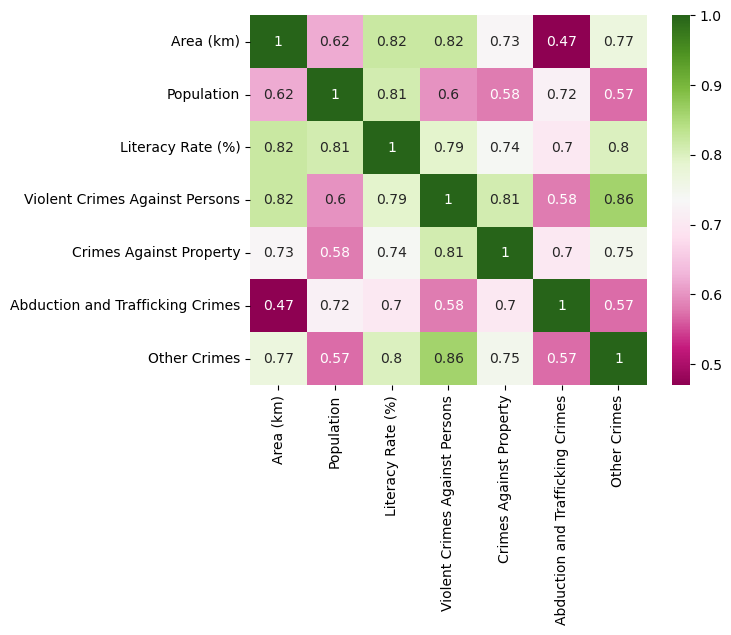

In [9]:
ipc['Area (km)'] = ipc['Area (km)'].astype('object')

new_ipc = ipc.groupby(['STATE/UT','Area (km)'])[['Population', 'Literacy Rate (%)',
       'Violent Crimes Against Persons', 'Crimes Against Property',
       'Abduction and Trafficking Crimes', 'Other Crimes']].sum()

new_ipc.reset_index(inplace = True)
new_ipc['Area (km)'] = new_ipc['Area (km)'].astype('int64')

new_ipc.drop('STATE/UT', axis=1, inplace = True)
new_ipc.head()

sns.heatmap(round(new_ipc.corr(),2), cmap = 'PiYG', annot = True)

**CONCLUSION:**

1. There is a robust positive correlation between area and literacy rate, as well as with specific crime categories such as Violent Crimes Against Persons, Crimes Against Property, and Other Crimes.


2. The literacy rate exhibits a strong positive correlation with nearly all measured variables.

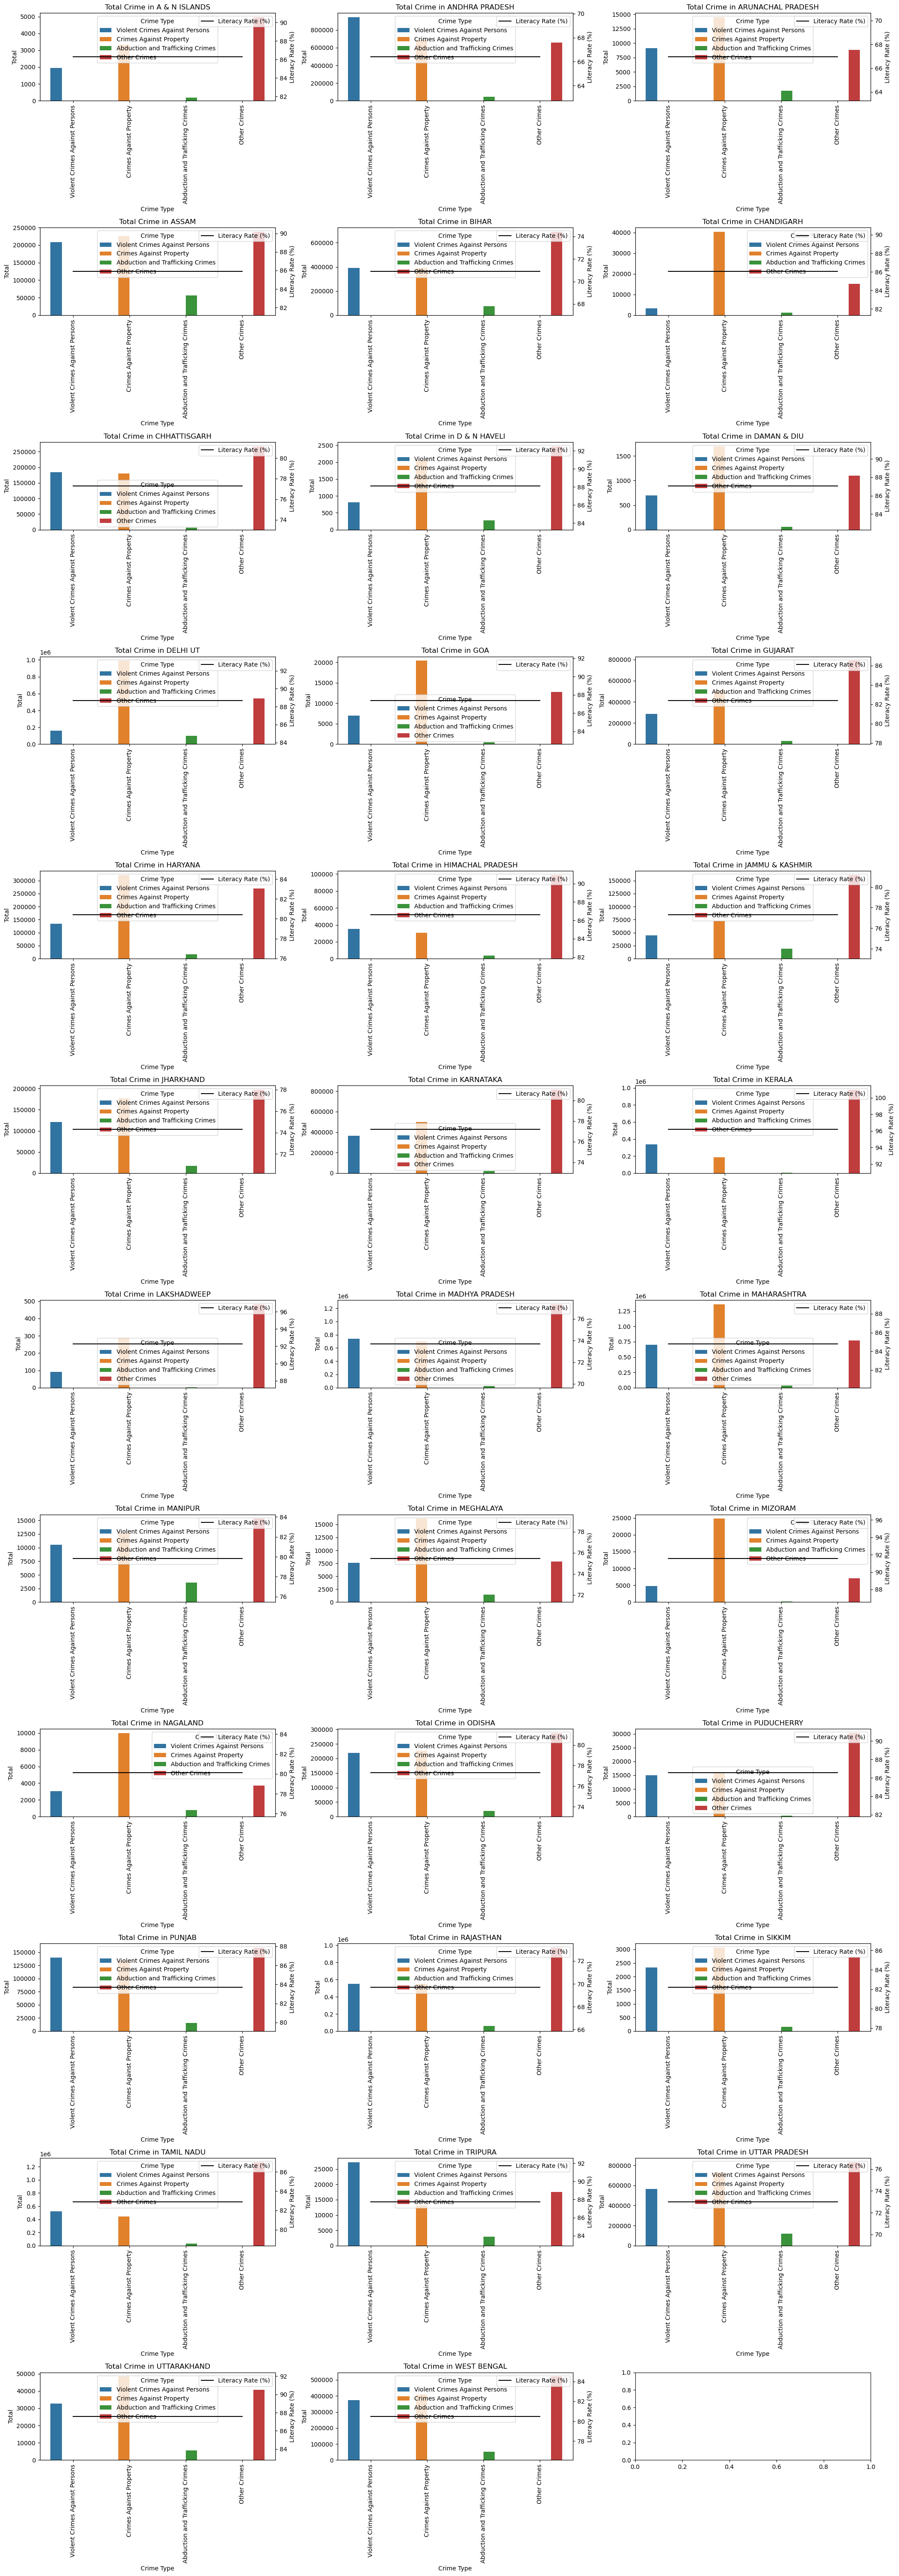

In [10]:
# Visualization of various crime types statewise

crime_totals = ipc.groupby('STATE/UT')[['Violent Crimes Against Persons', 'Crimes Against Property',
       'Abduction and Trafficking Crimes', 'Other Crimes']].sum()
       
crime_totals = crime_totals.reset_index()

crime_totals_melt = crime_totals.melt(id_vars='STATE/UT', var_name='Crime Type', value_name='Total')

df_merged = pd.merge(crime_totals_melt, ipc[['STATE/UT', 'Literacy Rate (%)']].drop_duplicates(), on='STATE/UT')

states = df_merged['STATE/UT'].unique()

n_rows = int(np.ceil(len(states) / 3))

fig, axs = plt.subplots(n_rows, 3, figsize=(21, 5*n_rows))
axs = axs.ravel()

for i, state in enumerate(states):
    df_state = df_merged[df_merged['STATE/UT'] == state]
    
    sns.barplot(x='Crime Type', y='Total',hue= 'Crime Type', data=df_state, ax=axs[i])
    
    ax2 = axs[i].twinx()
    sns.lineplot(x='Crime Type', y='Literacy Rate (%)', data=df_state, ax=ax2,  color='black', label='Literacy Rate (%)')
    
    axs[i].set_title(f'Total Crime in {state}')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Conclusion:**

The plot above illustrates statewise crime statistics, featuring the literacy rate marker for each state.

Among the observed states, three exhibit the highest distribution of crime within the category of Violent Crimes Against Persons.

A predominant trend is noted across states, wherein the majority demonstrates the highest distribution of crime within the "Others" category.

## 2.3	Analysis of year-on-year total crime rate.

In [11]:
# Save a copy of ipc as ipc2

ipc2 = ipc.copy()
ipc_grouped2 = ipc2.groupby('YEAR').agg({'TOTAL IPC CRIMES': 'sum' , 'Literacy Rate (%)': 'mean','Population': 'mean'} )
ipc_grouped2['Crime Rate'] = ipc_grouped2['TOTAL IPC CRIMES'] / ipc_grouped2['Population'] *100

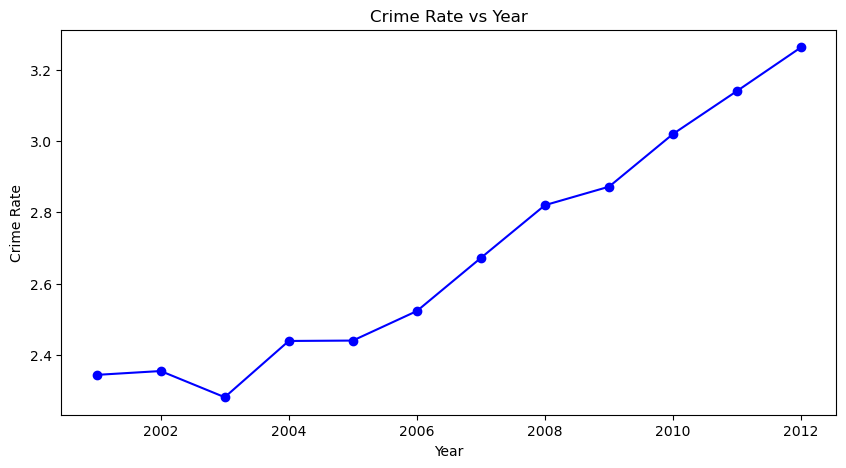

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the crime rate against year
ax.plot(ipc_grouped2.index, ipc_grouped2['Crime Rate'], color='b', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Crime Rate')
ax.set_title('Crime Rate vs Year')

plt.show()


**CONCLUSION:**

A noticeable upward trend in the overall crime rate per year is evident, particularly post-2003.

In [13]:
ipc3 = ipc.copy()
ipc3 = ipc3.drop(['STATE/UT', 'DISTRICT', 'Area (km)',  'Literacy Rate (%)'], axis=1)
# Divide all columns except 'YEAR' by 'Population'
columns_to_divide = ipc3.columns.drop('YEAR')
ipc3 = ipc3.groupby('YEAR').sum()

ipc3[columns_to_divide] = ipc3[columns_to_divide].div(ipc3['Population'], axis=0)*100000
# Drop the 'Population' column
ipc3 = ipc3.drop('Population', axis=1)

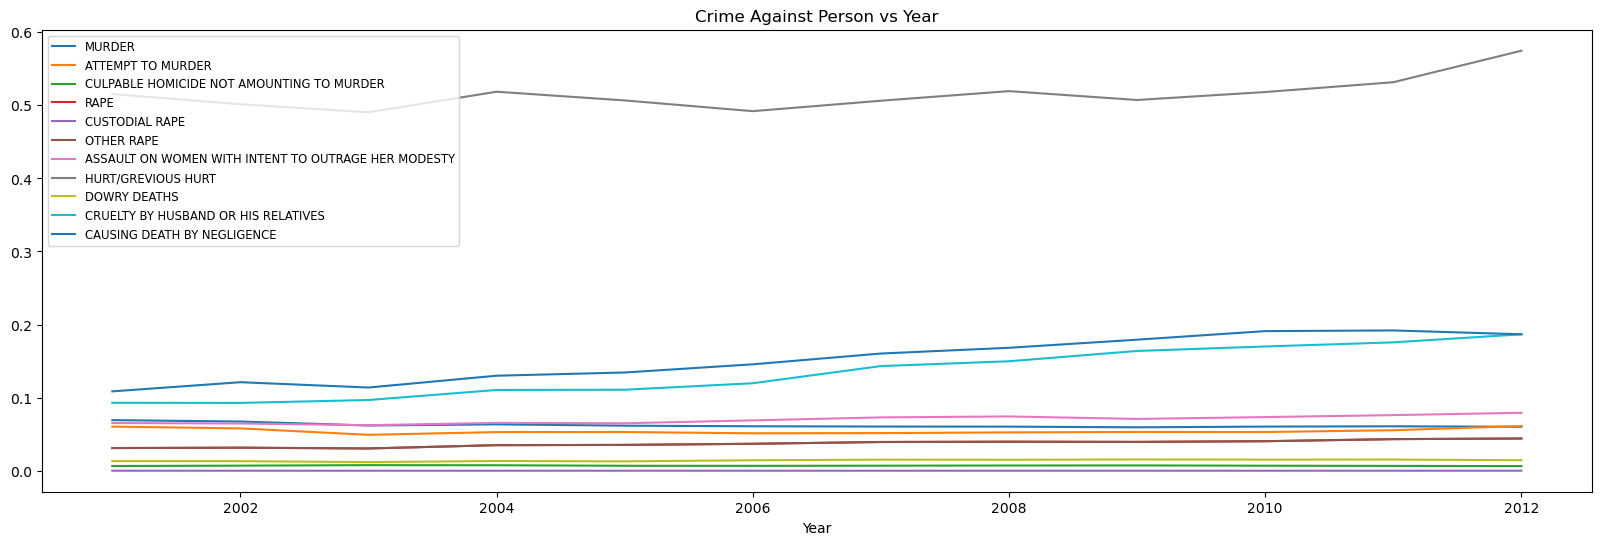

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))


for j, column in enumerate(violent_crimes_against_persons):
    ax.plot(ipc3.index, ipc3[column], label=column, color=f'C{j}')

plt.xlabel('Year')
plt.title('Crime Against Person vs Year')
plt.legend(loc='upper left', fontsize='small')
plt.show()


**Conclusion:**

A gradual yearly increase is observed in the instances of Causing Death by Negligence and Cruelty by Husband or His Relatives. 

The category of Hurt/Grievous Hurt exhibits a fluctuating pattern, characterized by intermittent decreases and increases, resulting in a discernible zigzag trend.

Conversely, the remaining categories depict stable, flat lines, indicating negligible variations over time.

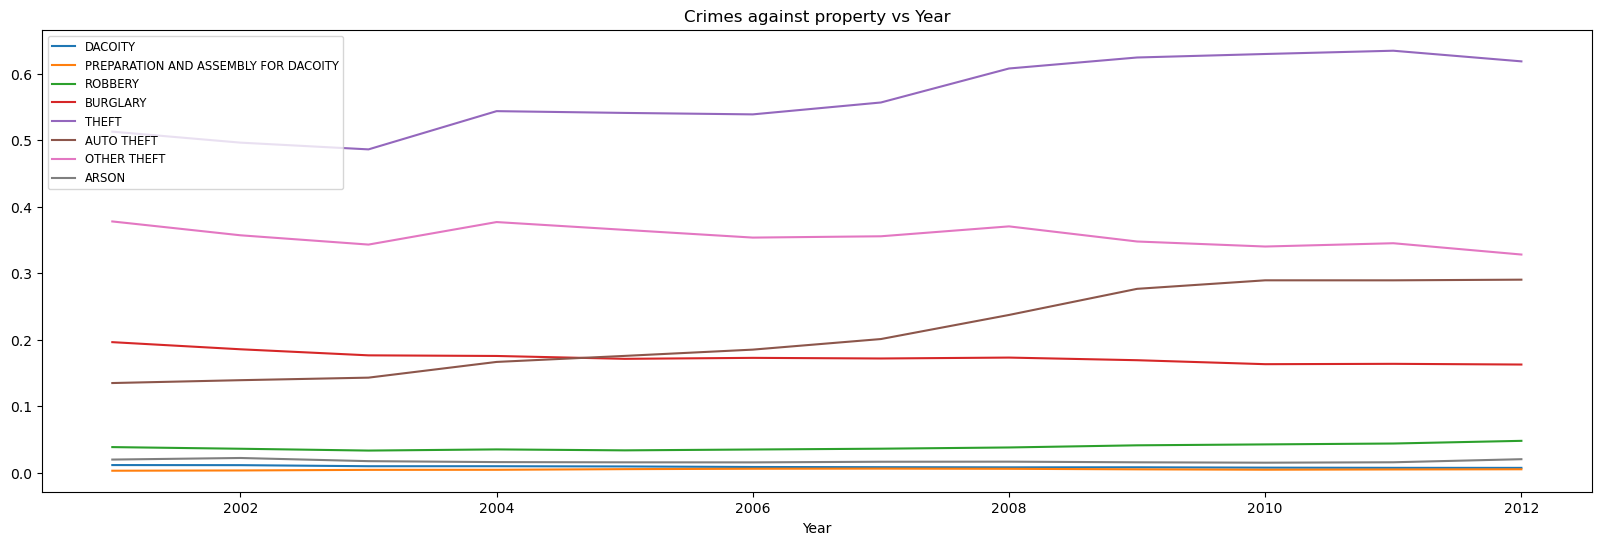

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))

for j, column in enumerate(crimes_against_property):
    ax.plot(ipc3.index, ipc3[column], label=column, color=f'C{j}')

plt.xlabel('Year')
plt.title('Crimes against property vs Year')
plt.legend(loc='upper left', fontsize='small')
plt.show()


**Conclusion:**

Auto theft demonstrated a notable increase from 2003 to 2009.

In contrast, Robbery, Arson, Other Theft, and Preparation & Assemblance for Dacoity exhibit flat lines, indicative of no significant change over the observed period.

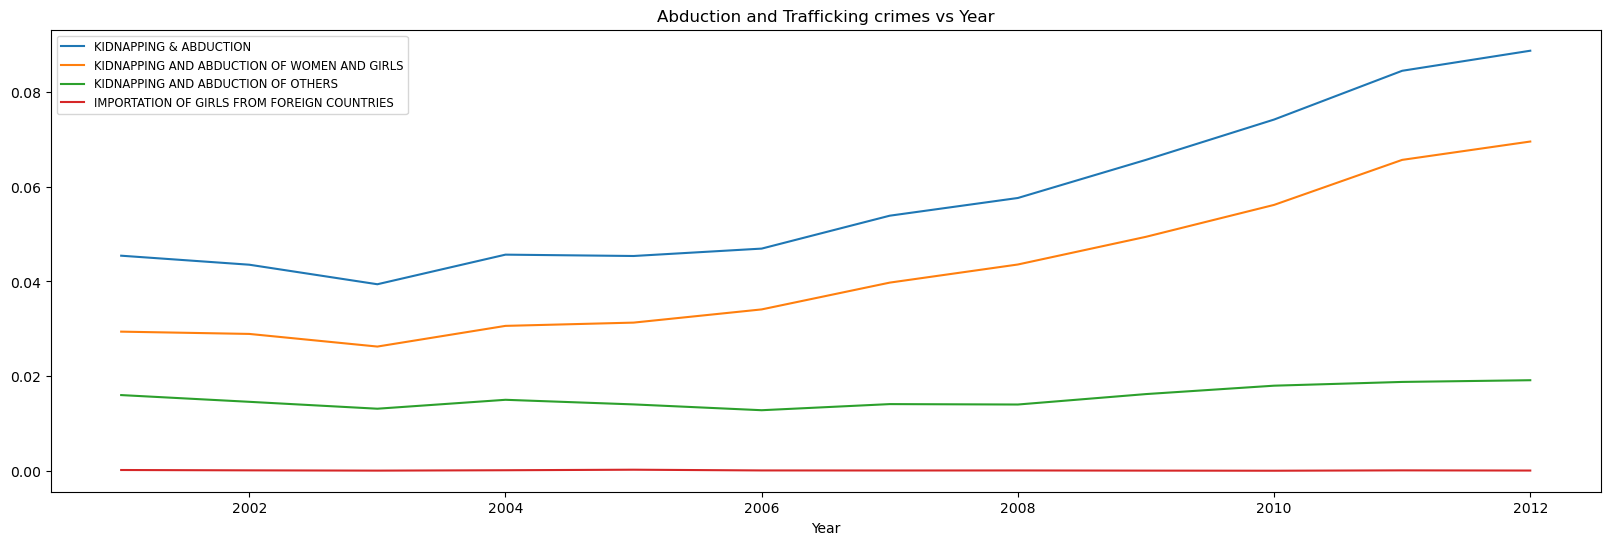

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))

for j, column in enumerate(abduction_and_trafficking_crimes):
    ax.plot(ipc3.index, ipc3[column], label=column, color=f'C{j}')

plt.xlabel('Year')
plt.title('Abduction and Trafficking crimes vs Year')
plt.legend(loc='upper left', fontsize='small')
plt.show()


**CONCLUSION:**

The instances of Kidnapping & Abduction, as well as Kidnapping and Abduction of Women & Girls, exhibit a continuous increase from 2006 onwards.

Conversely, the data indicates no significant changes in the trend of Importation of Girls from Foreign Countries over the observed period.

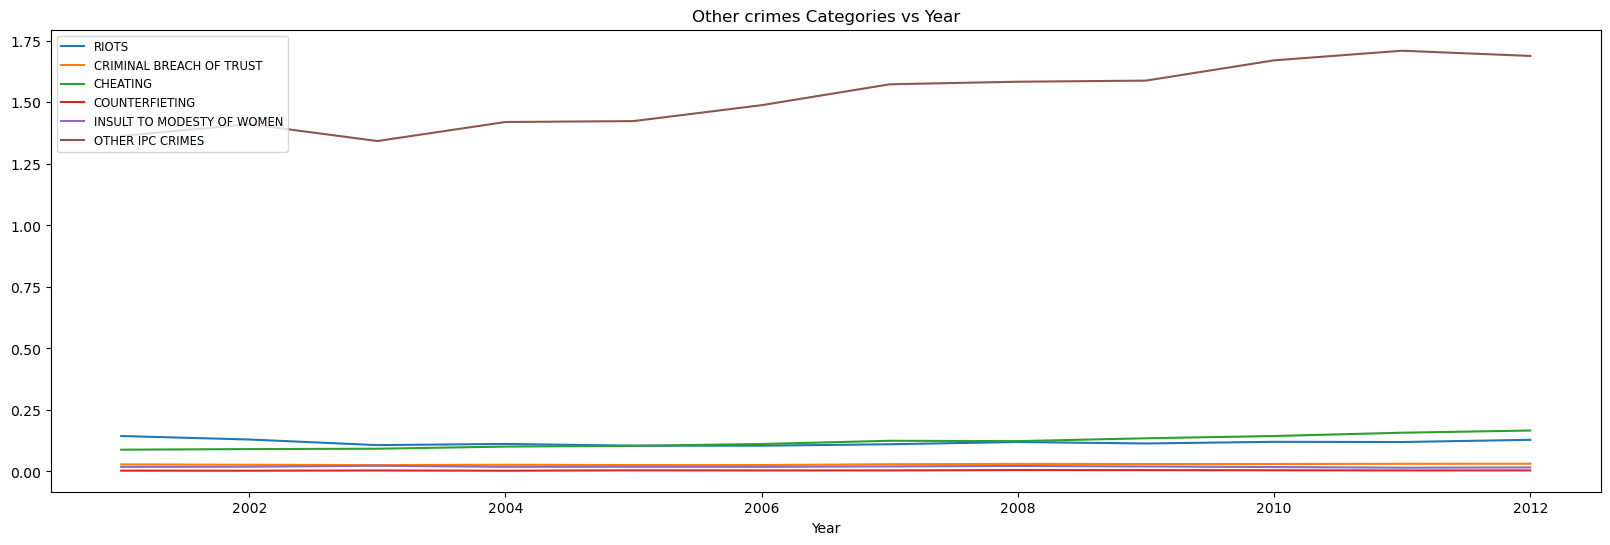

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))

for j, column in enumerate(other_crimes):
    ax.plot(ipc3.index, ipc3[column], label=column, color=f'C{j}')

plt.xlabel('Year')
plt.title('Other crimes Categories vs Year')
plt.legend(loc='upper left', fontsize='small')
plt.show()


**Conclusion:**

With the exception of Other IPC Crimes, no significant changes are observed in the trends within the specified categories.

## 2.4 Analysis of area vs overall crime

In [18]:
ipc1 = ipc.copy()

ipc_grouped_2 = ipc1.groupby('STATE/UT').agg({'TOTAL IPC CRIMES': 'sum', 'Area (km)': 'mean', 'Population': 'mean'})
ipc_grouped_2['Crime Rate'] = ipc_grouped_2['TOTAL IPC CRIMES'] / ipc_grouped_2['Population'] *100
ipc_grouped_2['Population Density'] = ipc_grouped_2['Population'] / ipc_grouped_2['Area (km)']

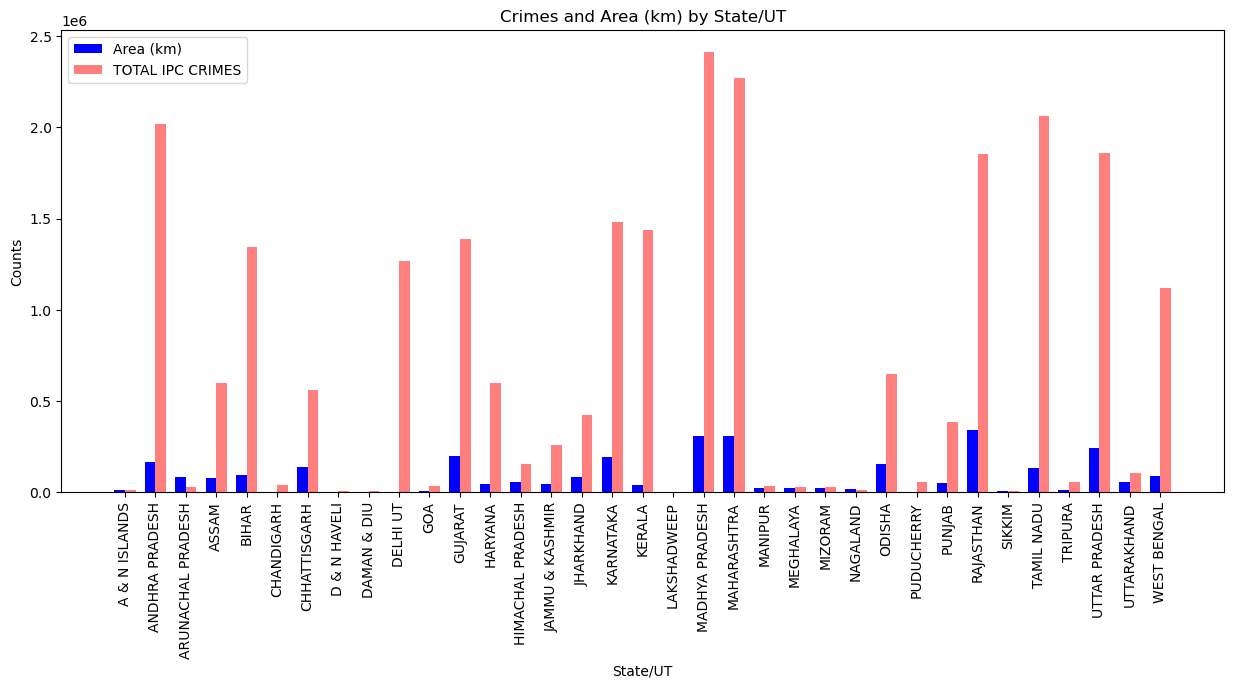

In [19]:
# Assuming ipc_grouped_2 is a DataFrame with columns 'State/UT', 'Area', and 'TOTAL IPC CRIMES'
# and it is indexed by 'State/UT'

fig, ax1 = plt.subplots(figsize=(15, 6))

# Set the width of the bars
bar_width = 0.35

# Generate an array of indices for the x-axis positions
indices = np.arange(len(ipc_grouped_2))

# Plot the crime rate
ax1.bar(indices - bar_width/2, ipc_grouped_2['Area (km)'], width=bar_width, color='b', label='Area (km)')
ax1.bar(indices + bar_width/2, ipc_grouped_2['TOTAL IPC CRIMES'], width=bar_width, color='r', alpha=0.5, label='TOTAL IPC CRIMES')

ax1.set_xlabel('State/UT')
ax1.set_ylabel('Counts')
ax1.set_title('Crimes and Area (km) by State/UT')
ax1.set_xticks(indices)
ax1.set_xticklabels(ipc_grouped_2.index, rotation=90, ha='center')

# Add legend
ax1.legend(loc='upper left')

plt.show()


**CONCLUSION:**

A notable trend reveals that a larger geographical area is associated with a higher incidence of IPC Crimes.

### 2.5 Analysis of Population vs overall Crime

In [20]:
ipc_grouped_2.head()

,TOTAL IPC CRIMES,Area (km),Population,Crime Rate,Population Density
STATE/UT,,,,,
A & N ISLANDS,9102,8249.0,417036.0,2.182545,50.555946
ANDHRA PRADESH,2018981,162975.0,54059448.0,3.734742,331.70393
ARUNACHAL PRADESH,27652,83743.0,1530531.0,1.806693,18.276525
ASSAM,597764,78438.0,35607039.0,1.678780,453.951388
BIHAR,1346293,94163.0,128633376.0,1.046613,1366.071344


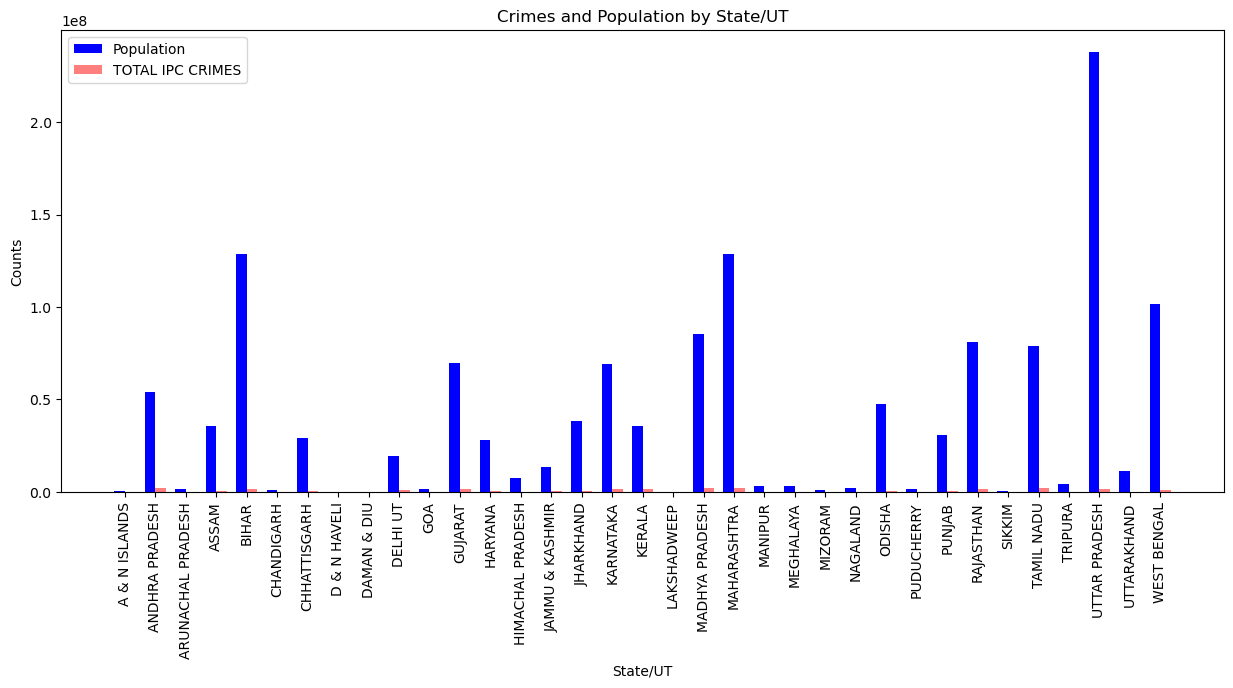

In [21]:
# Assuming ipc_grouped_2 is a DataFrame with columns 'State/UT', 'Population', and 'TOTAL IPC CRIMES'
# and it is indexed by 'State/UT'

fig, ax1 = plt.subplots(figsize=(15, 6))

# Set the width of the bars
bar_width = 0.35

# Generate an array of indices for the x-axis positions
indices = np.arange(len(ipc_grouped_2))

# Plot the crime rate
ax1.bar(indices - bar_width/2, ipc_grouped_2['Population'], width=bar_width, color='b', label='Population')
ax1.bar(indices + bar_width/2, ipc_grouped_2['TOTAL IPC CRIMES'], width=bar_width, color='r', alpha=0.5, label='TOTAL IPC CRIMES')

ax1.set_xlabel('State/UT')
ax1.set_ylabel('Counts')
ax1.set_title('Crimes and Population by State/UT')
ax1.set_xticks(indices)
ax1.set_xticklabels(ipc_grouped_2.index, rotation=90, ha='center')

# Add legend
ax1.legend(loc='upper left')

plt.show()


**Conclusion:**

The data suggests a positive correlation, indicating that higher population numbers are associated with an increased likelihood of higher IPC Crimes.

#### 2. 6 State crime report.

Refer sheet for complete stats (State-Wise): 
https://docs.google.com/document/d/1LW6s8qIVwd7FAJ5zpV88IZznshxSQ-3Cvlhq2_v_Cx0/edit

In [44]:
# Add to the DataFrame

ipc_grouped_2['Crime to Literacy'] = ratio

In [45]:
ipc_grouped_2.describe()

,TOTAL IPC CRIMES,Population,Crime Rate,Crime to Literacy
count,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,7.021094e+05,3.867296e+07,2.397447,2.900109
std,7.987868e+05,5.143310e+07,2.701372,3.062840
min,7.430000e+02,2.851600e+04,0.584153,0.729188
25%,2.985150e+04,1.558390e+06,1.118938,1.430970
50%,3.841310e+05,1.921659e+07,1.904666,2.311844
75%,1.366034e+06,6.171551e+07,2.236438,2.957987
max,2.413770e+06,2.378827e+08,16.310142,18.509012


#### Summary

Crime to literacy rate ratios exceeding 2.96 are categorized as high, those below 1.44 as low, and ratios falling in between as average. 

Similarly, crime rates surpassing 2.23% are considered high, those below 1.12% as low, and rates in between as average.

In [47]:
sorted_crimetoliteracy = ratio.sort_values(ascending=True)

sorted_crimetoliteracy.head(5)

STATE/UT
NAGALAND         0.729188
MEGHALAYA        0.993589
UTTARAKHAND      1.047145
UTTAR PRADESH    1.069984
LAKSHADWEEP      1.100198
dtype: float64

In [48]:
sorted_crimetoliteracy.tail(5)

STATE/UT
KERALA             4.185612
PUDUCHERRY         4.423336
ANDHRA PRADESH     5.624612
DELHI UT           7.429390
D & N HAVELI      18.509012
dtype: float64

In [43]:
sorted_crimetoliteracy.tail(5)

STATE/UT
KERALA             4.185612
PUDUCHERRY         4.423336
ANDHRA PRADESH     5.624612
DELHI UT           7.429390
D & N HAVELI      18.509012
dtype: float64

#### Crime to Literacy Ratio

Upon scrutinizing crime data across Indian states, Nagaland emerges with the lowest crime-to-literacy ratio at 0.7291, reflecting a commendable synergy between literacy and law enforcement. Meghalaya (0.9935), Uttarakhand (1.047), and Uttar Pradesh (1.0699) closely follow suit, indicating effective governance in education and law enforcement.

Conversely, Daman and Diu (D & N Haveli) confront an exceptionally high crime-to-literacy ratio (18.509). Despite a commendable literacy rate (>80%), the elevated crime rate underscores potential socioeconomic challenges, particularly unemployment, leading to illicit activities. Delhi UT and Andhra Pradesh trail closely with ratios of 7.429 and 5.624, respectively, highlighting a prevalence of property-related crimes. Addressing these challenges requires targeted interventions and strategic policy measures.

This nuanced analysis reveals distinctive regional patterns, providing valuable insights for policymakers to devise targeted strategies aimed at crime prevention and community safety.

#### Crime Ratio

In [76]:
ipc_grouped.reset_index()
cr_rate = ipc_grouped['Crime Rate'].sort_values()

print("Top 5 \n",cr_rate.head())
print('\n')
print("Bottom 5 \n",cr_rate.tail())

Top 5 
 STATE/UT
NAGALAND         0.584153
MEGHALAYA        0.749961
UTTAR PRADESH    0.781088
UTTARAKHAND      0.917299
SIKKIM           1.014124
Name: Crime Rate, dtype: float64


Bottom 5 
 STATE/UT
ANDHRA PRADESH     3.734742
PUDUCHERRY         3.828397
KERALA             4.026559
DELHI UT           6.589869
D & N HAVELI      16.310142
Name: Crime Rate, dtype: float64


**Conclusion on basis of Crime Ratio**

In the examination of state-wise crime ratios, Nagaland, Meghalaya, and Uttar Pradesh stand out with the lowest crime rates, reflecting commendable safety standards. Conversely, Andhra Pradesh, Puducherry, and Kerala demonstrate comparatively higher crime ratios.

Nagaland takes the lead with a minimal ratio of 0.58, while Daman and Diu (D & N Haveli) face a higher ratio of 16.31.

This summary highlights significant disparities in reported crime incidence across Indian states, emphasizing the necessity for targeted interventions in regions with higher crime rates and recognizing successful practices in those with lower crime ratios.